# Example Notebook

This is an example notebook.

Modify / remove any of the below as suited for your needs

## Setup

In [1]:
# package install 
# !pip3 install flake8
# !pip3 install m2r
# !pip3 install nbformat
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install pytest
# !pip3 install pytest-cookies
# !pip3 install pytest-cov
# !pip3 install sphinx
# !pip3 install spacy

# Standard python packages
import os
import sys

# # for natural language processing: named entity recognition
# import spacy
# from spacy.displacy.render import EntityRenderer
# from IPython.core.display import display, HTML

# Other package imports
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use("ggplot")

Setup some global settings and configuration

In [2]:
project_root = os.path.abspath(os.path.join(os.pardir, os.pardir))
data_folder = os.path.join(project_root, 'data')
data_folder_raw = os.path.join(data_folder, 'raw')
src_folder = os.path.join(project_root, 'src')
print(project_root)
print(data_folder)
print(data_folder_raw)
print(src_folder)

/notebooks
/notebooks/data
/notebooks/data/raw
/notebooks/src


This notebook uses the shared package however first we need to ensure it is available (otherwise you get an error about the module not being found). You can either run setup.py as discussed in the readme to install the package or modify the path to include the src folder.

In [3]:
# Explicitly set path so don't need to run setup.py - if we have multiple copies of 
# the code we would otherwise need to setup a seperate environment for each to
# ensure the code pointers are correct.
sys.path.insert(0, "../src")

from neraccidente import examplemodule

## Some Processing

In [4]:
# Use our package
examplemodule.hello_world()

'Hello World'

## Appendix 1 - Environment Configuration

In [5]:
print (os.getcwd())
print (sys.version)
print (sys.executable)
print (sys.path)

/notebooks/ner-accidente/notebooks
3.8.2 (default, Jul 16 2020, 14:00:26) 
[GCC 9.3.0]
/usr/bin/python3
['../src', '/notebooks/ner-accidente/notebooks', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython']


## Appendix 2 - Automated Tests

In [6]:
# Run tests within notebook
f_path = os.getcwd()
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

# Run pytest from the repository root
!pytest

os.chdir(f_path)

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-5.4.3, py-1.9.0, pluggy-0.13.1
rootdir: /notebooks
plugins: cov-2.10.1, cookies-0.5.1
collected 5 items                                                              

ner-accidente/tests/neraccidente/examplemodule/test_add_value_to_numpy.py . [ 20%]
..                                                                       [ 60%]
ner-accidente/tests/neraccidente/examplemodule/test_hello_world.py ..    [100%]

============================== 5 passed in 0.23s ===============================


In [7]:
# import our dataSet for analysis
path = os.path.join('../data', 'raw', 'ner - locatia accidente.csv')
# print(path)

df = pd.read_csv(path)
# print(f"Loaded {accident_data.shape[0]} samples.")

print(df)

      id  y                                               text  com
0      0  1  un sofer a tamponat o femeie pe trecerea pieto...  NaN
1      1  1  aseara jurul orei 2330 politia capitalei a fos...  NaN
2      6  1  accidentul s a intamplat aceasta dimineata pe ...  NaN
3      7  1  un pieton a fost spulberat mortal aseara un ta...  NaN
4     10  1  accidentul a avut loc sectorul botanica pe ||s...  NaN
..   ... ..                                                ...  ...
150  370  1  intersectia strazilor ||vadul|| ||lui|| ||voda...  NaN
151  371  1  un accident lant a avut loc aceasta dimineata ...  NaN
152  373  1  potrivt politei accidentul a avut loc acum o o...  NaN
153  375  1  accidentul s a produs astazi intersectia ||bul...  NaN
154  376  1  un barbat moarte dupa ce inima acestuia s a op...  NaN

[155 rows x 4 columns]


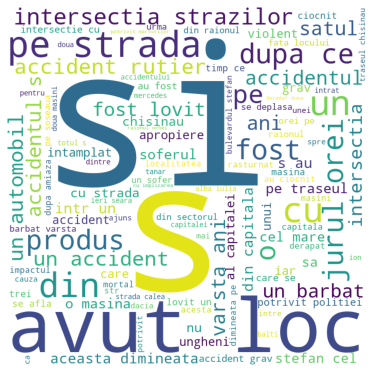

In [8]:
#nice library to produce wordclouds
# !pip3 install wordcloud
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

 

#looping through all incidents and joining them to one text, to extract most common words
# for arg in df["text"]: 
#     tokens = arg.split()  
#     all_words += " ".join(tokens)+" "
#     print (all_words)

def generate_cloud(data_frame):
    all_words = ''
    for arg in data_frame:
        tokens = arg.split()  
        all_words += " ".join(tokens)+" "
#         print (all_words)
    wordcloud = WordCloud(width = 700, height = 700, background_color ='white', min_font_size = 10).generate(all_words) 
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    
generate_cloud(df["text"])

In [9]:
# TIME TO DETECT ENTITIES AND CLEAN THE TEXT
import spacy
from spacy import displacy
# install romanian models
# !python3 -m spacy download ro_core_news_lg

#Plot and image tools
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mticker
import seaborn as sns
sns.set_style("dark")

nlp = spacy.load("ro_core_news_lg")
all_stopwords = nlp.Defaults.stop_words

# lower the text so that it all is in lowercase
df['text'] = df['text'].str.lower()
# remove all stop words that appear in the romanian text corpus
df['text_no_sw'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

In [10]:
# !pip3 install nltk
# PLOTTING THE BARS
import string
import nltk


def plot_word_freq(text_to_plot, title='Placeholder title'):
    fd2 = nltk.FreqDist(word for word in text_to_plot)      
    x=[fd2.most_common(55)[i][0] for i in range(55)]
    y=[fd2.most_common(55)[i][1] for i in range(55)]

    #palette=sns.color_palette("PuBuGn_d",100)
    palette= sns.light_palette("crimson",100,reverse=True)
    plt.figure(figsize=(65,25))
    ax= sns.barplot(x, y, alpha=0.8,palette=palette)
    plt.title(title, fontsize=110)
    plt.ylabel('Occurrences', fontsize=190)
    plt.xlabel(' Word ', fontsize=110)
    #adding the text labels
    rects = ax.patches
    labels = y
    sns.set(font_scale=3)
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        
        ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')
        plt.xticks(rotation=90, fontsize=30)
    #plt.savefig('Toxic_Word_count1.png')    
    plt.show()


def generate_cloud(data_frame):
    all_words = ''
    for arg in data_frame:
        tokens = arg.split()  
        all_words += " ".join(tokens)+" "
#         print (all_words)
    wordcloud = WordCloud(width = 1000, height = 1000, background_color ='white', min_font_size = 10).generate(all_words) 
    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    

# Find all the words that can be found in both lists
def get_words_that_appear_in_both(text_inpul_1,text_input_2):
    same_words = set(text_inpul_1).intersection(text_input_2)
    same_words = list(same_words)
    return same_words
#     print(same_words)
#     return same_words

529


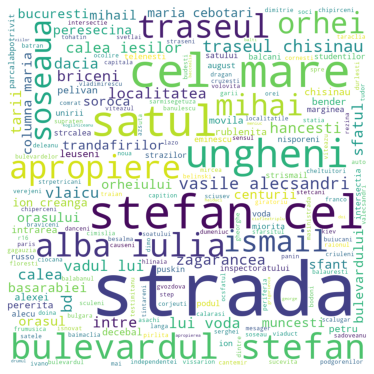

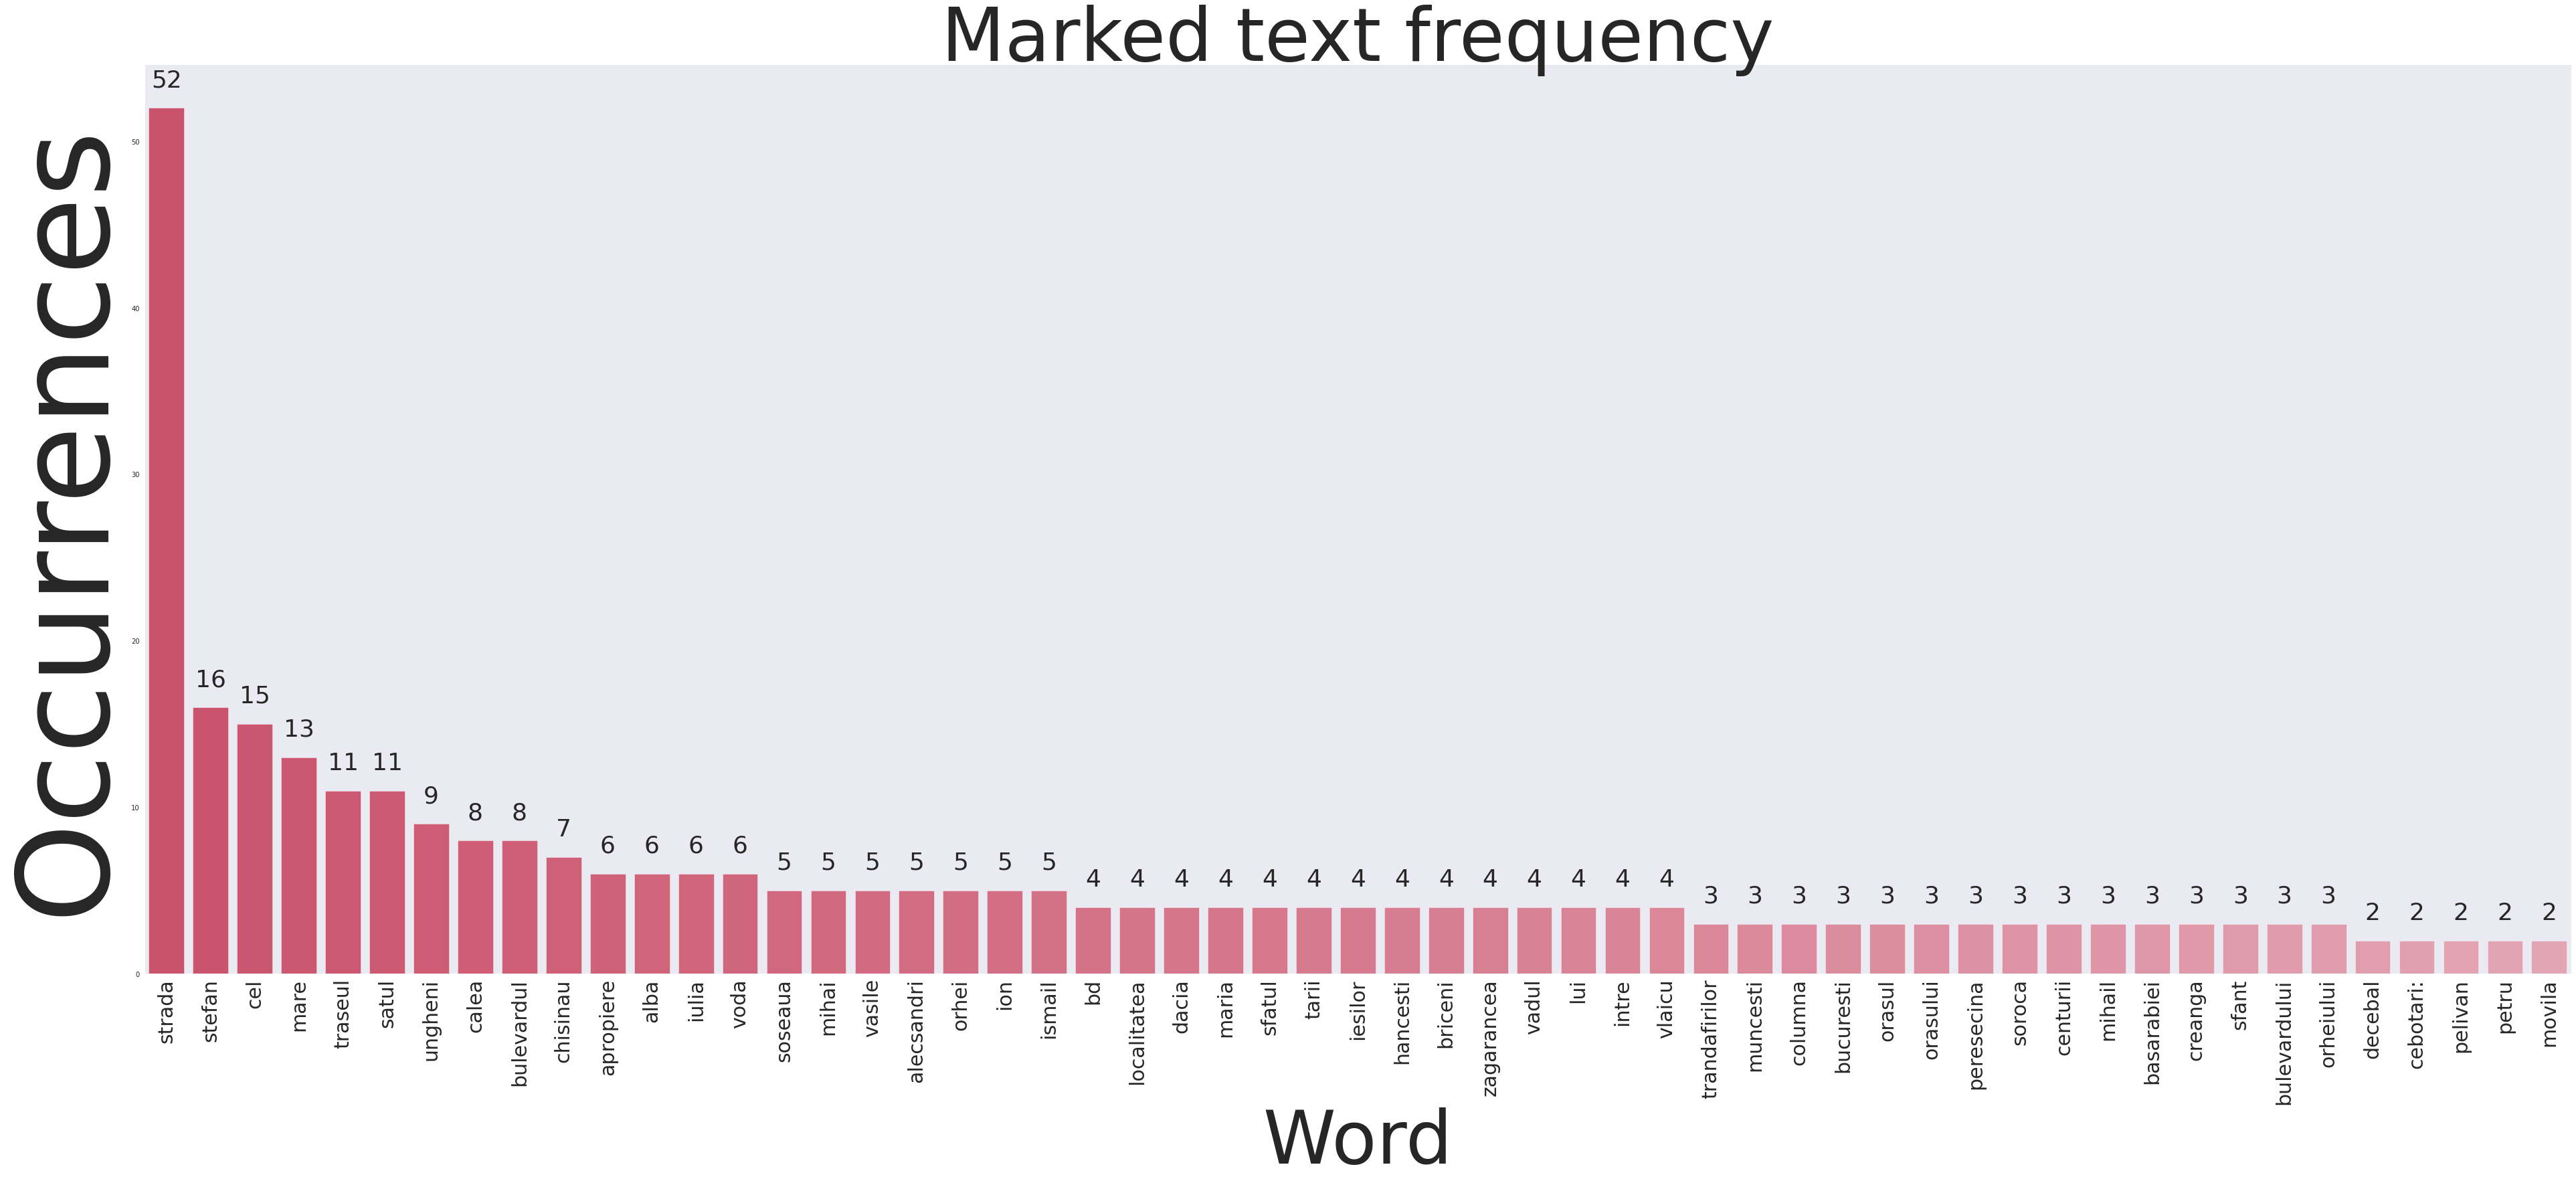

In [11]:
all_marked_text = []
all_unmarked_text = []
for phrases in df['text_no_sw']:
    phrases = phrases.split(" ")
    for words in phrases:
#         print(phrase)
        i_processed = words.replace("|","")
        if "|" in words:
            all_marked_text.append(i_processed)
        else:
            all_unmarked_text.append(words)

# Visualize text that has not been annotated    
# print(all_marked_text)
print(len(all_marked_text))
generate_cloud(all_marked_text)
plot_word_freq(all_marked_text, title='Marked text frequency')

2108


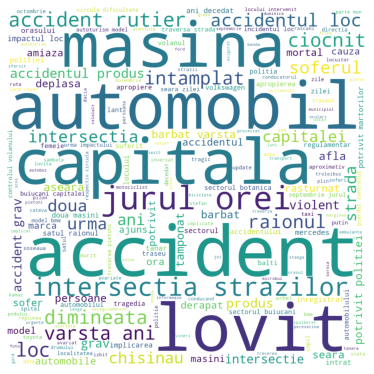

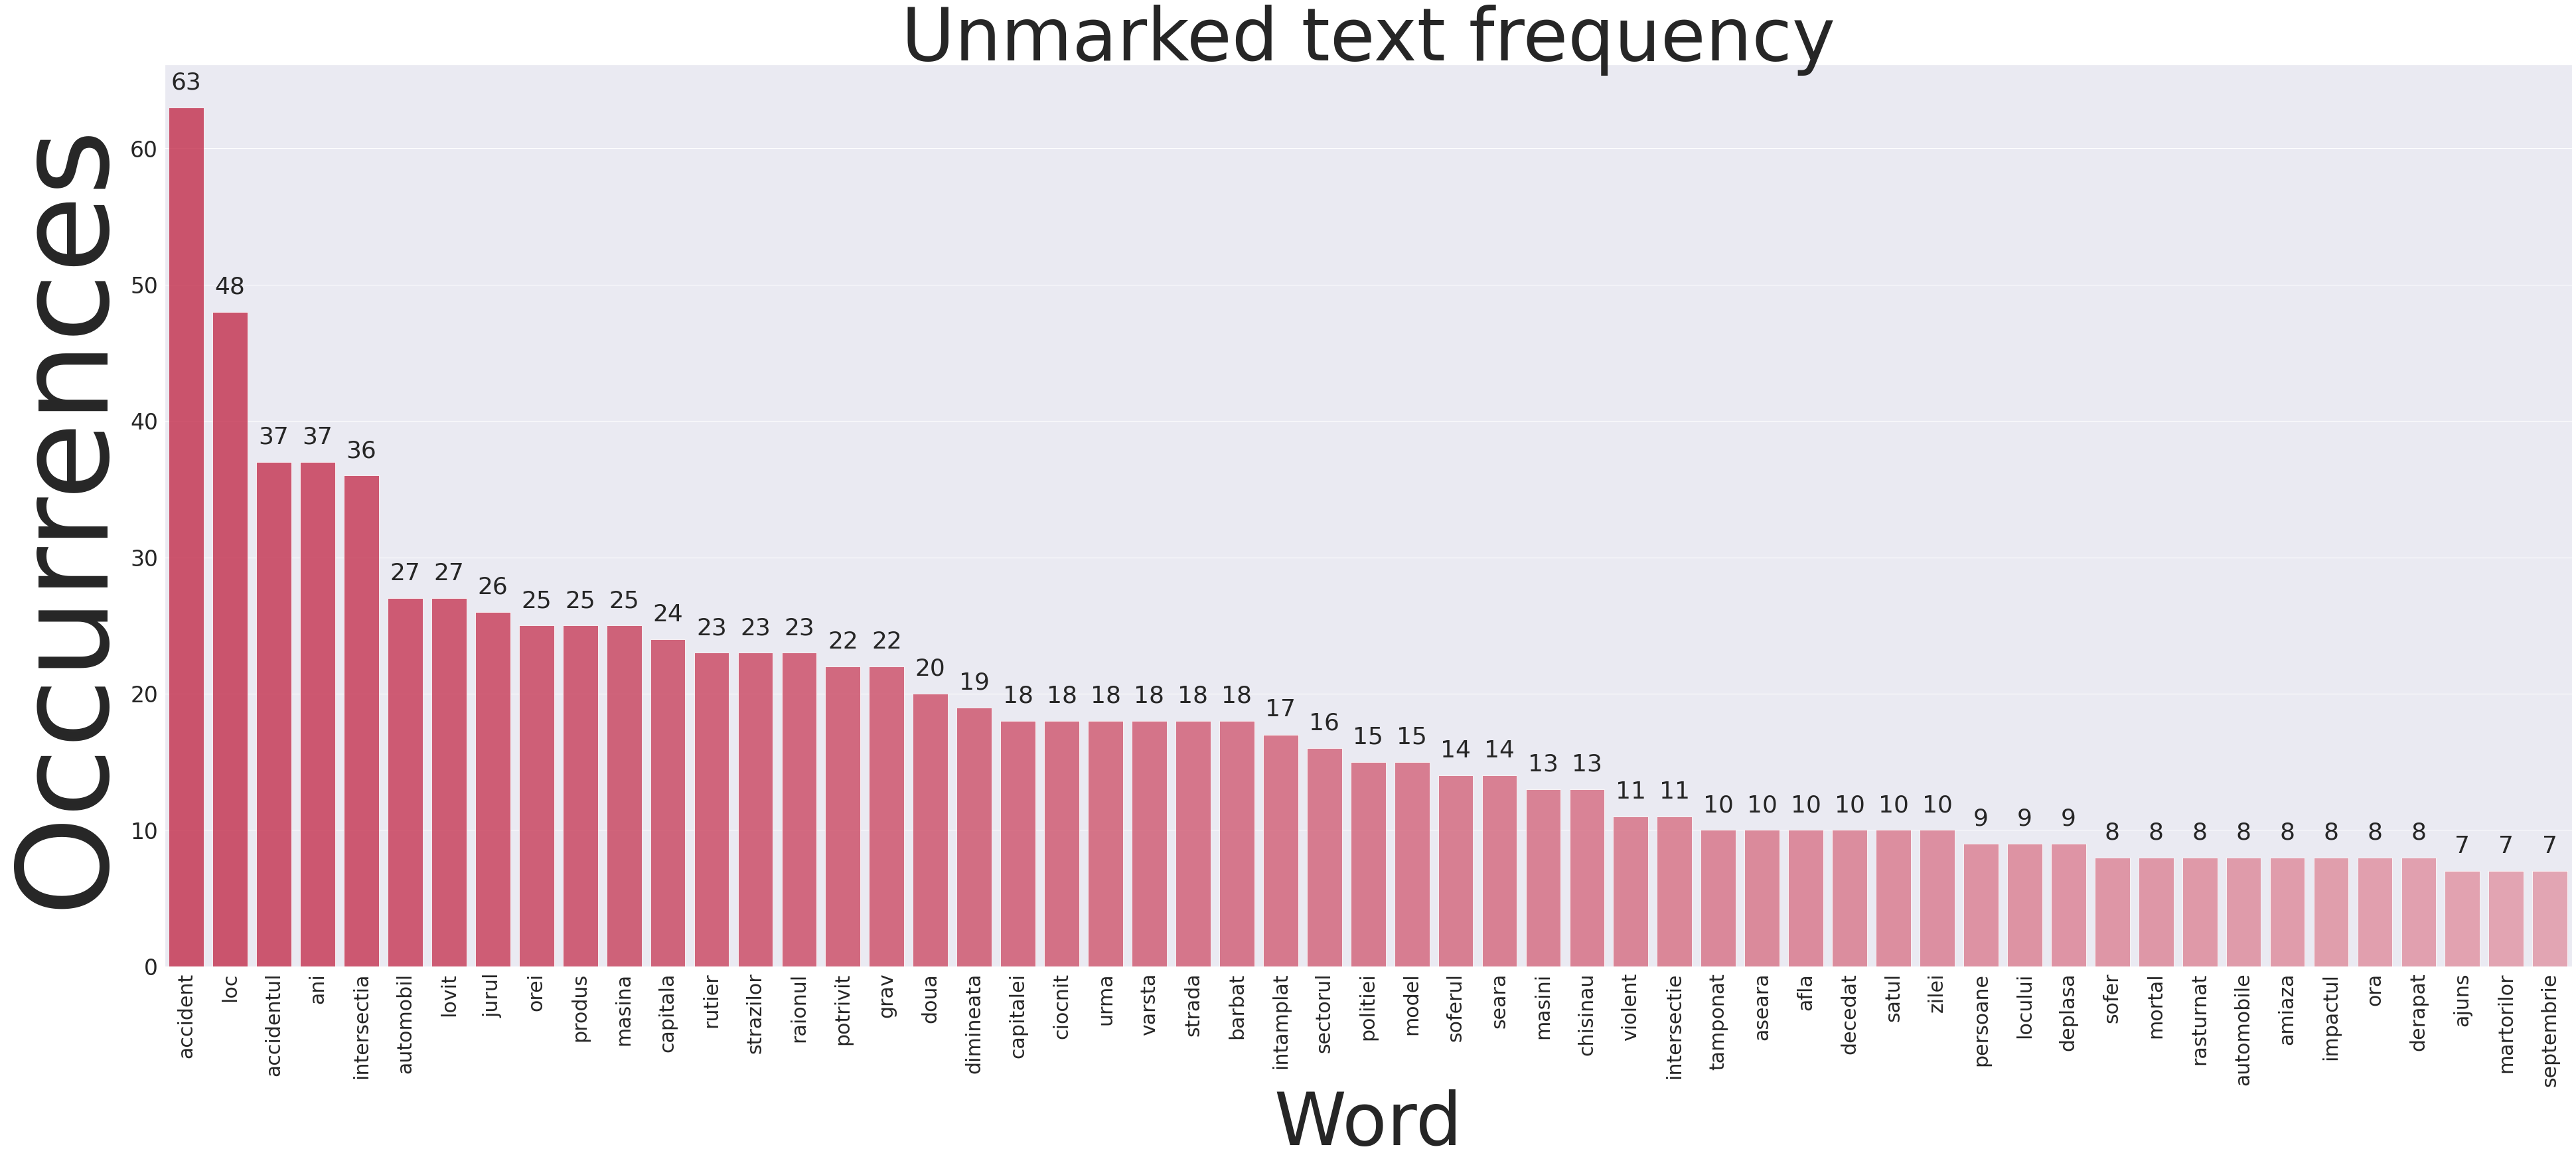

In [12]:
# Visualize text that has not been annotated
# print(all_unmarked_text)
print(len(all_unmarked_text))
generate_cloud(all_unmarked_text)
plot_word_freq(all_unmarked_text, title='Unmarked text frequency')

In [13]:
# Visualize the words that appear both in marked and in unmarked text
get_words_that_appear_in_both(all_marked_text, all_unmarked_text)
print(len(same_words))
generate_cloud(same_words)
plot_word_freq(same_words)

NameError: name 'same_words' is not defined

In [ ]:
# TIME TO DETECT ENTITIES AND CLEAN THE TEXT
import spacy
from spacy import displacy
# install romanian models
# !python3 -m spacy download ro_core_news_lg

nlp = spacy.load("ro_core_news_lg")
all_stopwords = nlp.Defaults.stop_words

# lower the text so that it all is in lowercase
df['text'] = df['text'].str.lower()
# remove all stop words that appear in the romanian text corpus
df['text_no_sw'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))



# print(df)
# n_samples_train = 120
# n_samples_test = 20
# train_text = df[0:n_samples_train]['text']
# test_text = df[n_samples_train:-1]['text']
# print(train_text)
# print(test_text)



In [ ]:
# # TIME TO DETECT ENTITIES 

n_samples_train = 120
n_samples_test = 20

# train_text = df[0:n_samples_train]['text']
# test_text = df[n_samples_train:-1]['text']
# print(train_text)
# print(test_text)

sentence = df['text_no_sw'][12]
sentence_nlp = nlp(sentence)

# # print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

# # visualize named entities
displacy.render(sentence_nlp, style='ent', jupyter=True)

In [ ]:
nlp = spacy.load("ro_core_news_lg")
nlp.pipe_names

In [ ]:
# doc = nlp("impactul a avut loc intersectia strazii 31 august cu strada ismail")
doc = nlp("accidentul s a intamplat aceasta dimineata apropiere comuna tohatin")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [ ]:
import re
all_data = "accidentul ||mihai|| ||viteazul|| din capitala"
splited = all_data.split(" ")

last_len = 0

key_words = []
position = []
entities = [] 
for i in splited:
    i_processed = i.replace("|","")
    if "|" in i:
        start = last_len + 1
        finish = last_len + len(i_processed)
        last_len += len(i_processed) + 1
        
        entities.append(f"({start},{finish}, 'LOC')]")
        position.append(start)
        position.append(finish)
        print(position)
        print(f"start: {start} // finish: {finish}")
        print(f'"{all_data}"')
    else: 
        last_len += len(i_processed) + 1
        print(all_data,{"entities": entities})
        
        
print(entities)
## "accidentul mihai viteazul din capitala",{"entities": [(6,15, "LOC"), (16,24, "LOC")]}), ##

In [ ]:
# import re
# all_data = "accidentul s a intamplat aceasta dimineata ||apropiere|| ||comuna|| ||tohatin||"
# len(string)
# key_words=["apropiere", "comuna", "tohatin"]
# position = []
# for word in key_words:
#     start = int(all_data.find(word)) - 2
#     finish = int(start + len(word)) - 2
#     position = position.append(start,finish)
#     print(f"start: {start} // finish: {finish}")
#     print((len((key_words)-1)*', (start,finish, "LOC")')
#     for pos1 in position:
#         print(f"accidentul s a intamplat aceasta dimineata apropiere comuna tohatin",{"entities": [(start,finish, "LOC"), (start,finish, "LOC")]}),


In [ ]:
# import re
# all_data = "accidentul sa intamplat aceasta dimineata apropiere comuna tohatin"
# print(len(all_data))

# key_words=["apropiere", "comuna tohatin"]

# position = []
# for word in key_words:
#     start = int(all_data.find(word))
#     finish = int(start + len(word))
#     position.append(start)
#     position.append(finish)
#     print(position)
#     print(f"start: {start} // finish: {finish}")
#     print((len((key_words))-1)*", (start,finish, 'LOC')")
#     for pos1, pos2 in position:
#         print(f"accidentul s a intamplat aceasta dimineata apropiere comuna tohatin",{"entities": [(pos1,pos2, "LOC"), (pos1,pos2, "LOC")]}),


In [ ]:
# import re
# all_data = "accidentul ||mihai|| ||viteazul|| din capitala"
# splited = all_data.split(" ||")
# key_words = []
# for i in splited:
#     if "|" in i:
#         i = i.replace("|","")
#         all_data = all_data.replace("|","")
#         key_words.append(i)
#         print(key_words)
#         position = []
#         for word in key_words:
#             start = int(all_data.find(word))
#             finish = int(start + len(word))
#             position.append(start)
#             position.append(finish)
#             print(position)
#             print(f"start: {start} // finish: {finish}")
#             for index, elem in enumerate(position):
#                  if (index+1 < len(position) and index - 1 >= 0):
#                     prev_el = str(position[index-1])
#                     curr_el = str(elem)
#                     next_el = str(position[index+1])
#                     print(prev_el,curr_el)
# #                   entities = (len((position))+1) * (prev_el,curr_el, "LOC")
#                     print(all_data,{"entities": [(elem,next_el, "LOC")]})

# "accidentul mihai viteazul din capitala",{"entities": [(6,15, "LOC"), (16,24, "LOC")]}),

In [ ]:
import re
all_data = "accidentul ||mihai|| ||viteazul|| din capitala"
splited = all_data.split(" ")

last_len = 0

key_words = []
position = []
entities = [] 
for i in splited:
    i_processed = i.replace("|","")
    if "|" in i:
        start = last_len + 1
        finish = last_len + len(i_processed)
        last_len += len(i_processed) + 1
        
        entities.append(f"({start},{finish}, 'LOC')]")
        position.append(start)
        position.append(finish)
        print(position)
        

        
        print(f"start: {start} // finish: {finish}")
        print(f'"{all_data}"')
    else: 
        last_len += len(i_processed) + 1
        
        print(all_data,{"entities": entities})
        
        
print(entities)
#         "accidentul mihai viteazul din capitala",{"entities": [(6,15, "LOC"), (16,24, "LOC")]}),